In [153]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

number of PLA interations 11
PLA learned wieghts: w0= -4.0   w1= 0.15625791888588836   w2= -41.060818987767476
LR learned wieghts: w0= -0.2604633437935997   w1= 0.008895825130855763   w2= -0.0778655748211905


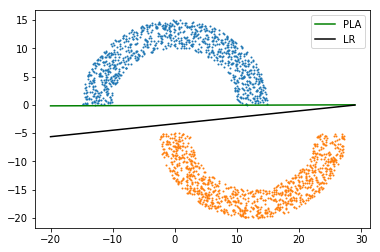

In [154]:
import matplotlib.pyplot as plt
import random
top,bottom = generatedata(rad,thk,sep,2000)

# X1,Y1 in top semisircle, f(X1,Y1) = -1
# X2,Y2 in bottom semicircle, f(X2,Y2) = -1

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

# PLA
# initial weigths
w0 = w1 = w2 = 0.0
#number of iterations, maximum iterations allowed is 10,000
k = 0
# flag to indicate that no missclassified points left
done = False
    
while done == False and k < 10000:       
    for i in np.random.permutation(len(top)+len(bottom)):
        done = True
        if i < len(top): #top
            z = -1.0  
            s = w0 + w1*X1[i] + w2*Y1[i]
            if  s*z <= 0:                        
                w0= w0 + z
                w1= w1 + z*X1[i]
                w2= w2 + z*Y1[i]
                done = False
                break      
        else: #bottom
            z = 1.0    
            s = w0 + w1*X2[i-len(top)] + w2*Y2[i-len(top)]
            if  s*z <= 0:                        
                w0= w0 + z
                w1= w1 + z*X2[i-len(top)]
                w2= w2 + z*Y2[i-len(top)]
                done = False
                break    
    k= k + 1
               
print('number of PLA interations', k)
print('PLA learned wieghts: ''w0=', w0,'  w1=', w1, '  w2=', w2)

# final hypothesis, g
t= np.arange(-20,30)
g= -(w1*t)/w2 - w0/w2
plt.plot(t, g, linestyle='-', color='green', label= 'PLA')
plt.legend(loc= 'best')
#plt.show()   

#Linear Regression
# Create outputs vector
z_top = [-1.0]*len(top)
z_bottom = [1.0]*len(bottom)
z = np.array(z_top + z_bottom)

# Create data matrix
for i in top:
    i.insert(0,1.0)
for i in bottom:
    i.insert(0,1.0)     
D = np.matrix(top + bottom)

D_t = D.transpose()
X = np.dot(D_t, D)

# pseudo inverse
X_p_inv = np.dot(X.I, D_t)

# calculatae weights
w = np.dot(X_p_inv, z)
print('LR learned wieghts: ''w0=', w[0,0],'  w1=', w[0,1], '  w2=', w[0,2])


# final hypothesis from Linear Regression
t= np.arange(-20,30)
g= -(w[0,1]*t)/w[0,2] - w[0,0]/w[0,2]
plt.plot(t, g, linestyle='-', color='black', label= 'LR')
plt.legend(loc= 'best')
plt.show()   


The final hypothesis achieved by Linear Regression Algorithm is different from PLA's one. However, both separate the data perfectly.